In [1]:

#from pymongo import MongoClient
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
import re
#from tensorflow.keras import layers
#from tensorflow import keras
#import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# client = MongoClient("mongodb://localhost:27017/")  #name of the connection string 
# db = client["DBLP"]             #name of the Database

# #collection_dblp = db["citation_data"]    #Name of the item Name
# collection_dblp = db["new_data"]
# collection_arix = db["Arix"]  
# # Fetch all data
# cursor = collection_dblp.find()


In [3]:
df=pd.read_csv("final_dataset.csv")
# df = pd.DataFrame(list(cursor)) 

In [4]:
#df.to_csv("final_dataset.csv")

In [5]:
df=df[['id','title','abstract','authors','n_citation','year','references','venue']]

In [6]:
df.head()

,id,title,abstract,authors,n_citation,year,references,venue
0,4ab3735c-80f1-472d-b953-fa0557fed28b,A new approach of 3D watermarking based on ima...,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,2008,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",international symposium on computers and commu...
1,4ab39729-af77-46f7-a662-16984fb9c1db,Attractor neural networks with activity-depend...,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,2007,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Neurocomputing
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,A characterization of balanced episturmian seq...,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,2007,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",Electronic Journal of Combinatorics
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,Exploring the space of a human action,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,2005,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",international conference on computer vision
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,Generalized upper bounds on the minimum distan...,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,2015,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Ima Journal of Mathematical Control and Inform...


In [7]:
df_null=df.copy()

In [8]:
df_null.isnull().sum()

id                 0
title              0
abstract      172467
authors            2
n_citation         0
year               0
references    124417
venue         177755
dtype: int64

In [9]:
df_null.dropna(inplace=True)

In [10]:
df_null.shape

(693622, 8)

In [11]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [12]:
#df_id=df_null[['id','title','abstract','n_citation','references']]
df_id = df_null[['id', 'title', 'abstract', 'n_citation', 'references']]#.sort_values(by='n_citation', ascending=False)
df_references=df_null[['id','references']]

In [13]:
df_id['original_title']=df_id['title']

C:\Users\GPR-03\AppData\Local\Temp\ipykernel_9664\3895716370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['original_title']=df_id['title']


In [14]:
df_id.dtypes

id                object
title             object
abstract          object
n_citation         int64
references        object
original_title    object
dtype: object

In [ ]:
df_id=df_id.head()

In [16]:
df_id1=df_id.copy()

In [17]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,4ab3735c-80f1-472d-b953-fa0557fed28b,A new approach of 3D watermarking based on ima...,"In this paper, a robust 3D triangular mesh wat...",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...
1,4ab39729-af77-46f7-a662-16984fb9c1db,Attractor neural networks with activity-depend...,We studied an autoassociative neural network w...,50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,A characterization of balanced episturmian seq...,It is well-known that Sturmian sequences are t...,50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,Exploring the space of a human action,One of the fundamental challenges of recognizi...,221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,Generalized upper bounds on the minimum distan...,This paper generalizes previous optimal upper ...,0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...


## Preprocessing Steps for Natural Language Processing (NLP)
### Text Cleaning
#### I. Converting to lowercase

In [18]:
df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\GPR-03\AppData\Local\Temp\ipykernel_9664\461851235.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)


### II. Removing URLs

In [19]:

url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    if isinstance(text, list):
        # Join list into a single string
        text = ' '.join(text)
    return url_pattern.sub('', text)

# Apply the function to the 'title' and 'abstract' columns and create new columns 'clean_title' and 'clean_abstract'
df_id['title'] = df_id['title'].apply(remove_urls)
df_id['abstract'] = df_id['abstract'].apply(remove_urls)

### III. Removing remove non-word and non-whitespace characters

In [20]:
df_id['title'] = df_id['title'].replace(to_replace=r'[^\w\s\b\d+]', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'[^\w\s\b\d+\b]', value='', regex=True)

### IV. Removing digits

In [21]:
df_id['title'] = df_id['title'].replace(to_replace=r'\d', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'\d', value='', regex=True)

## 2. Tokenization
#### Tokenization is the process of breaking down large blocks of text such as paragraphs and sentences into smaller, more manageable units.

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df_id['title'] = df_id['title'].apply(word_tokenize)

In [24]:
df_id['abstract'] = df_id['abstract'].apply(word_tokenize)


## 3. Stopword Removal
#### Stopwords refer to the most commonly occurring words in any natural language.

In [25]:
stop_words = set(stopwords.words('english'))
df_id['title'] = df_id['title'].apply(lambda x: [word for word in x if word not in stop_words])
df_id['abstract'] = df_id['abstract'].apply(lambda x: [word for word in x if word not in stop_words])

## 4. Stemming/Lemmatization

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GPR-03\AppData\Roaming\nltk_data...


True

In [28]:

from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df_id['title'] = df_id['title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_id['abstract'] = df_id['abstract'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Now 'df_id['title']' and 'df_id['abstract']' have tokenized, stopword-removed, and lemmatized words


In [ ]:
#df_id=pd.read_csv("PreFile.csv")

In [29]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,4ab3735c-80f1-472d-b953-fa0557fed28b,"[new, approach, watermarking, based, image, se...","[paper, robust, triangular, mesh, watermarking...",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",a new approach of 3d watermarking based on ima...
1,4ab39729-af77-46f7-a662-16984fb9c1db,"[attractor, neural, network, activitydependent...","[studied, autoassociative, neural, network, dy...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",attractor neural networks with activity-depend...
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,"[characterization, balanced, episturmian, sequ...","[wellknown, sturmian, sequence, non, ultimatel...",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",a characterization of balanced episturmian seq...
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,"[exploring, space, human, action]","[one, fundamental, challenge, recognizing, act...",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",exploring the space of a human action
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,"[generalized, upper, bound, minimum, distance,...","[paper, generalizes, previous, optimal, upper,...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",generalized upper bounds on the minimum distan...


C:\Users\GPR-03\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Embeddings added successfully in batches.


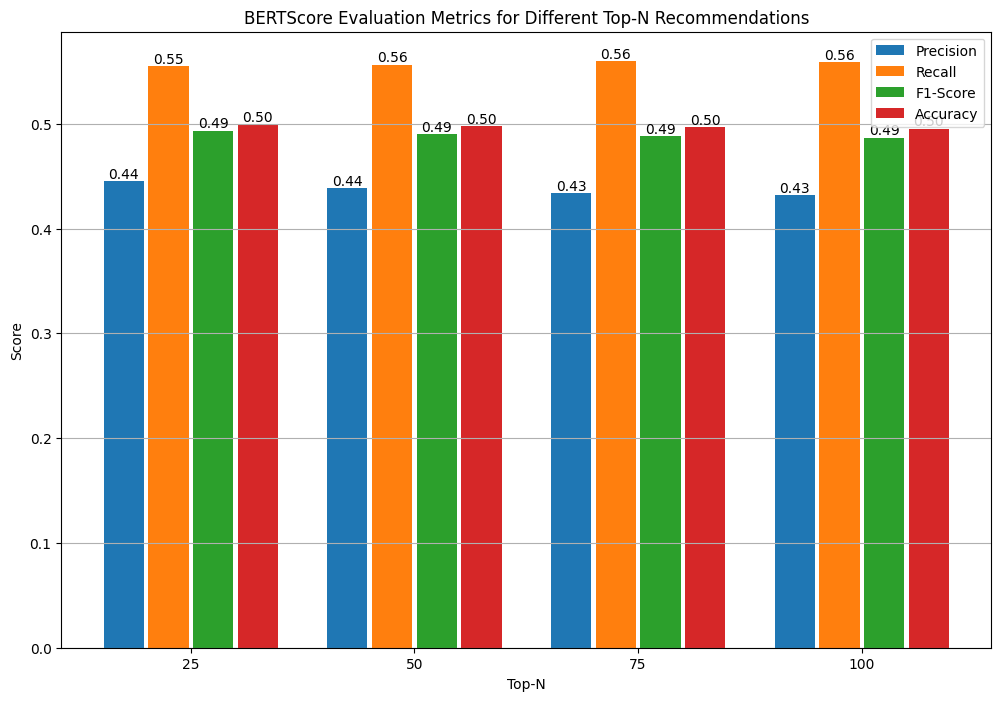

In [30]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from scipy.spatial.distance import cosine
import chromadb
from chromadb.config import Settings
from sklearn.metrics import accuracy_score
import bert_score
import matplotlib.pyplot as plt
from difflib import get_close_matches

# Check if GPU is available and move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # Optional, to confirm if you're using GPU

# Load the SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)  # Move model to device

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to GPU if available
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state.mean(dim=1)
    return embeddings

# Example dataframe processing
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']
df_id['text_embeddings'] = df_id['combined_text'].apply(lambda x: get_embeddings(x).squeeze().cpu().numpy().tolist())  # Move to CPU for Chroma

# Connect to Chroma and create a collection
client = chromadb.Client(Settings())
text_collection = client.create_collection("text_embeddings")

# Prepare data for adding to the Chroma collection
ids = df_id["id"].tolist()
text_embeddings = df_id["text_embeddings"].tolist()
text_metadatas = df_id[["title", "abstract"]].to_dict(orient="records")

# Function to split a list into smaller chunks
def split_into_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]

# Set batch size to 166
batch_size = 166

# Split the ids, embeddings, and metadata into smaller batches
id_batches = list(split_into_batches(ids, batch_size))
embedding_batches = list(split_into_batches(text_embeddings, batch_size))
metadata_batches = list(split_into_batches(text_metadatas, batch_size))

# Add each batch to the Chroma collection
for id_batch, embedding_batch, metadata_batch in zip(id_batches, embedding_batches, metadata_batches):
    text_collection.add(ids=id_batch, embeddings=embedding_batch, metadatas=metadata_batch)

print("Embeddings added successfully in batches.")

# Function to compute cosine similarity
def compute_cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)  # Cosine similarity is 1 - cosine distance

# Function to find similar texts using cosine similarity
def find_similar_texts_cosine(user_input, input_paper_id, top_n=5):
    user_embedding = get_embeddings(user_input).squeeze().to(device).cpu().numpy()  # Move to GPU and then back to CPU
    similarities = []
    for idx, row in df_id.iterrows():
        if row['id'] != input_paper_id:  # Exclude the input paper
            text_embedding = np.array(row['text_embeddings'])
            sim = compute_cosine_similarity(user_embedding, text_embedding)
            similarities.append((row['id'], sim))
    
    # Sort by similarity and get top N results
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Function for re-ranking the results
def re_rank_results(similar_texts):
    # Placeholder for re-ranking logic if needed
    return similar_texts  # For simplicity, returning the same list

# Function to find and re-rank similar texts
def find_and_rerank_similar_texts(user_input, input_paper_id, top_n=5):
    similar_texts = find_similar_texts_cosine(user_input, input_paper_id, top_n)
    re_ranked_texts = re_rank_results(similar_texts)
    return re_ranked_texts

# Function to recommend papers, excluding the input paper itself
def recommend_papers(user_input, input_paper_id, top_n=5):
    re_ranked_texts = find_and_rerank_similar_texts(user_input, input_paper_id, top_n)
    return re_ranked_texts

# BERTScore-based function for evaluating precision, recall, F1-score
def evaluate_bertscore(user_input, recommended_texts):
    # Use BERTScore to evaluate based on token similarity
    references = [user_input] * len(recommended_texts)  # The user input is the reference text
    candidates = [text for _, text in recommended_texts]  # The recommended paper texts are the candidates
    
    P, R, F1 = bert_score.score(candidates, references, model_type=model_name, lang="en", rescale_with_baseline=True)
    
    precision = P.mean().item()
    recall = R.mean().item()
    f1_score = F1.mean().item()
    
    return precision, recall, f1_score

# Function to recommend and evaluate papers with BERTScore
def recommend_and_evaluate(user_input, input_paper_id, top_n=5):
    recommended_papers = recommend_papers(user_input, input_paper_id, top_n)
    recommended_texts = [(paper_id, df_id[df_id["id"] == paper_id]["combined_text"].values[0]) for paper_id, sim in recommended_papers]
    
    precision, recall, f1 = evaluate_bertscore(user_input, recommended_texts)
    
    # For accuracy, we can use a placeholder calculation since BERTScore focuses on similarity
    accuracy = (precision + recall) / 2  # Simple proxy for now
    
    return precision, recall, f1, accuracy

# Example user input and input paper ID
user_input = "A new approach of 3D watermarking based on image segmentation"
input_paper_title = user_input.strip().lower()  # Example input paper title

# Match paper title to ID with error handling
matching_ids = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id']
if matching_ids.empty:
    potential_matches = get_close_matches(input_paper_title, df_id['original_title'].str.strip().str.lower().tolist(), n=1, cutoff=0.2)
    if not potential_matches:
        raise ValueError("No matching paper found for the input title.")
    input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == potential_matches[0]]['id'].values[0]
else:
    input_paper_id = matching_ids.values[0]

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on values
plot_metrics_for_top_n(results_df)


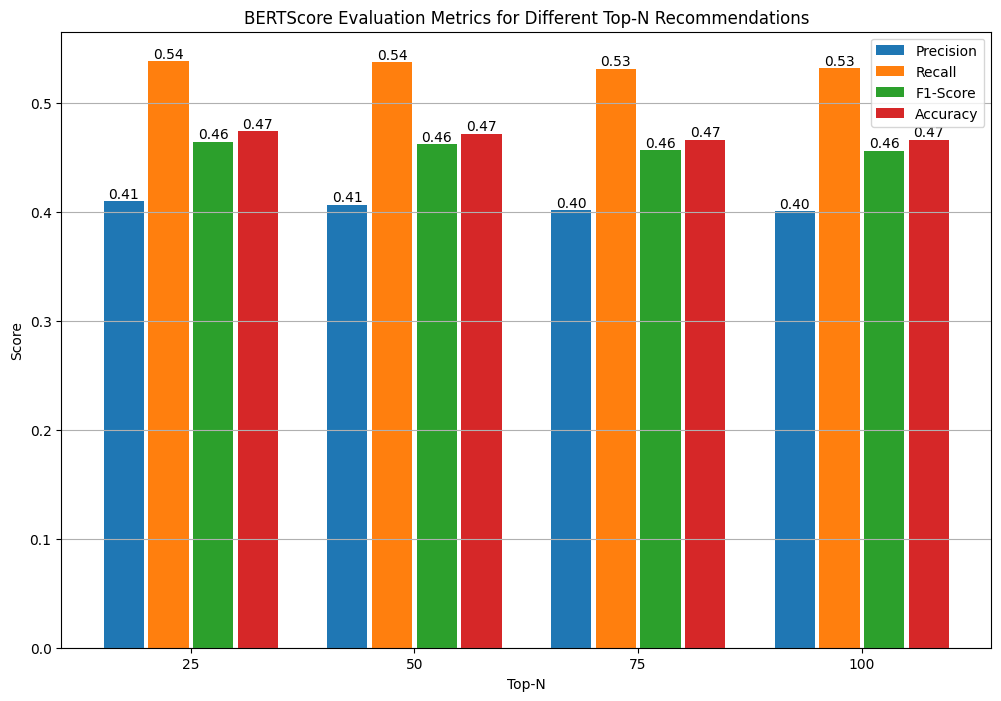

In [32]:
# Example user input and input paper ID
user_input = "Support-Vector Networks"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


In [ ]:
# Example user input and input paper ID
user_input = "A Tutorial on Support Vector Machines for Pattern Recognition"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


In [ ]:
# Example user input and input paper ID
user_input = "Identification and control of dynamical systems using neural networks"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


In [ ]:
# Example user input and input paper ID
user_input = "Gene Selection for Cancer Classification using Support Vector Machines"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


In [ ]:
# Example user input and input paper ID
user_input = "LIBSVM: A library for support vector machines"
input_paper_title = user_input.strip().lower()  # Example input paper title
input_paper_id = df_id[df_id['original_title'].str.strip().str.lower() == input_paper_title]['id'].values[0]  # Get input paper ID based on title

# Top-N values to evaluate
top_n_values = [25, 50, 75, 100]

# Dictionary to store results
results = {
    "Top-N": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Accuracy": []
}

# Run evaluations for each top-N value
for top_n in top_n_values:
    precision, recall, f1, accuracy = recommend_and_evaluate(user_input, input_paper_id, top_n)
    
    # Store results
    results["Top-N"].append(top_n)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["Accuracy"].append(accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Updated function to plot metrics for different Top-N values as bar charts with values showing up to 2 decimal places
def plot_metrics_for_top_n(results_df):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    plt.figure(figsize=(12, 8))
    
    # Setting reduced width for the bars to create more space between them
    bar_width = 0.18
    index = np.arange(len(results_df['Top-N']))
    
    # Adjust each metric to create slight space between the bars
    for i, metric in enumerate(metrics):
        bars = plt.bar(index + i * (bar_width + 0.02), results_df[metric], bar_width, label=metric)
        
        # Add the values on top of each bar, formatted to 2 decimal places
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', 
                     ha='center', va='bottom')  # Display values with 2 decimal places
    
    # Setting the x-ticks in the middle of the bars
    plt.xticks(index + bar_width * (len(metrics) / 2 - 0.5) + 0.03, results_df['Top-N'])
    
    plt.xlabel('Top-N')
    plt.ylabel('Score')
    plt.title('BERTScore Evaluation Metrics for Different Top-N Recommendations')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

# Call the updated function to plot metrics for different Top-N values with 2 decimal places on top of the bars
plot_metrics_for_top_n(results_df)


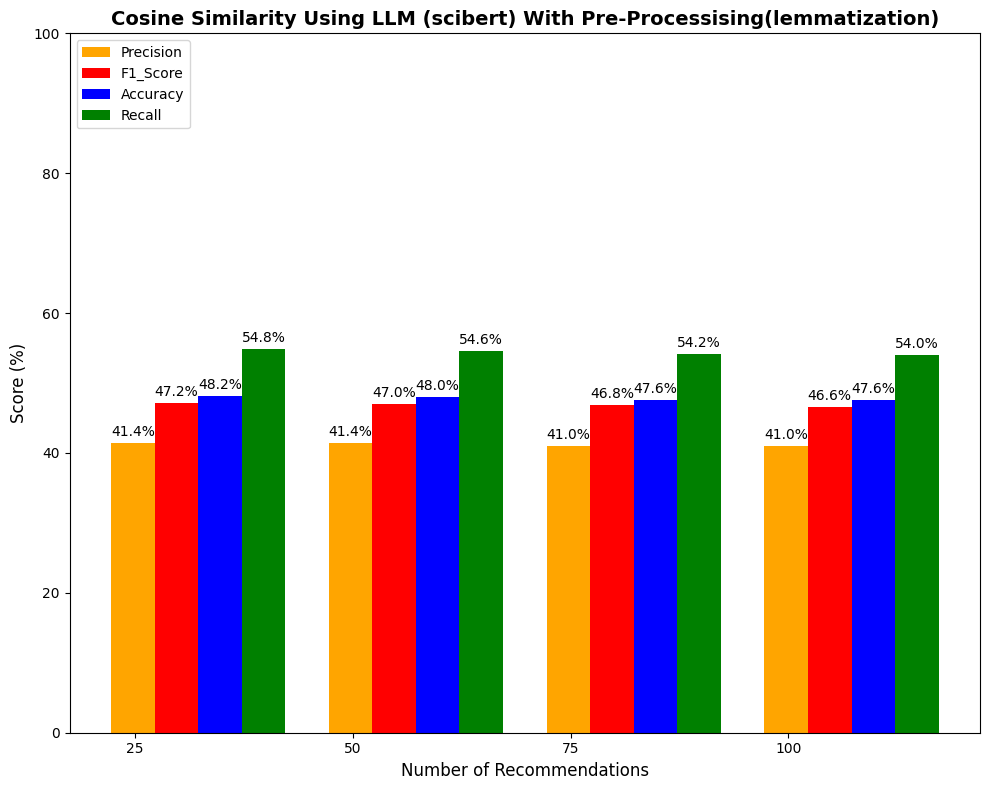

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Input data
results = {
    'Recommendations': [25, 50, 75, 100],
    'Accuracy': [
        [0.47, 0.50, 0.51, 0.46, 0.47],
        [0.47, 0.49, 0.51, 0.46, 0.47],
        [0.47, 0.49, 0.50, 0.45, 0.47],
        [0.47, 0.49, 0.50, 0.45, 0.47]
    ],
    'Precision': [
        [0.41, 0.42, 0.43, 0.40, 0.41],
        [0.41, 0.42, 0.43, 0.40, 0.41],
        [0.41, 0.42, 0.42, 0.40, 0.40],
        [0.41, 0.42, 0.42, 0.40, 0.40]
    ],
    'Recall': [
        [0.53, 0.57, 0.58, 0.52, 0.54],
        [0.53, 0.56, 0.59, 0.51, 0.54],
        [0.53, 0.56, 0.58, 0.51, 0.53],
        [0.53, 0.55, 0.58, 0.51, 0.53]
    ],
    'F1_Score': [
        [0.46, 0.49, 0.50, 0.45, 0.46],
        [0.46, 0.48, 0.50, 0.45, 0.46],
        [0.46, 0.48, 0.49, 0.45, 0.46],
        [0.46, 0.48, 0.49, 0.44, 0.46]
    ]
}

# Compute averages for each metric at each recommendation level and convert to percentages
averaged_results = {metric: [np.mean(values) * 100 for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors and order
metrics_order = ['Precision', 'F1_Score', 'Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 8))
x = np.arange(len(results['Recommendations']))
width = 0.2  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        bar = ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add labels above each bar
        ax.text(x[i] + j * width, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Set x-axis labels and title
ax.set_xticks(x + width * 0.05)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations", fontsize=12)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Cosine Similarity Using LLM (scibert) With Pre-Processising(lemmatization)", fontsize=14, fontweight='bold')

# Set y-axis scale from 0 to 100
ax.set_ylim(0, 100)

# Improve legend display
ax.legend(fontsize=10, loc="upper left")

plt.tight_layout()
plt.show()

